#  California housing price prediction

# Importing Modules

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

# Data Inspecting And Cleaning

In [7]:
dt=pd.read_csv('housing.csv')

In [8]:
dt.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200


In [9]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [12]:
dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
dt.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [14]:
# null values for all feature
dt.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

# Data Visualization

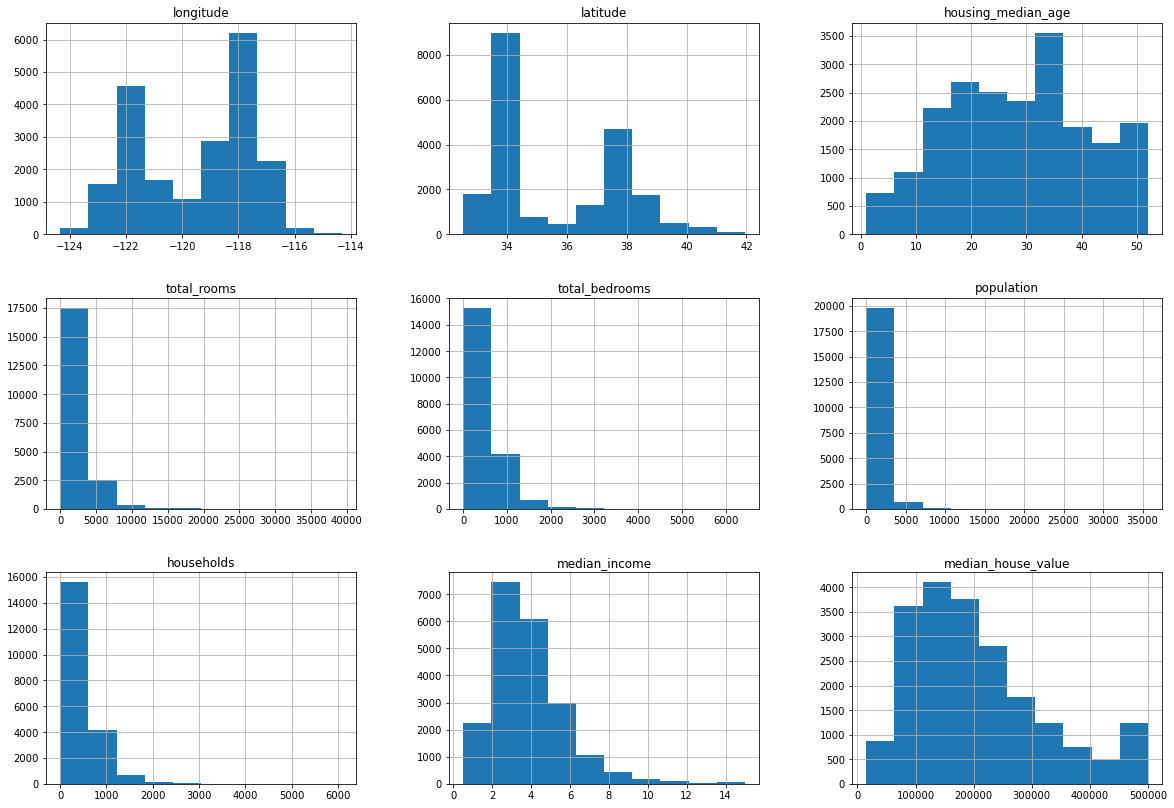

In [15]:
dt.hist(figsize=(20,14))
plt.show()

<AxesSubplot:>

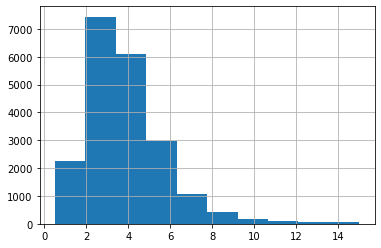

In [16]:

dt['median_income'].hist()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

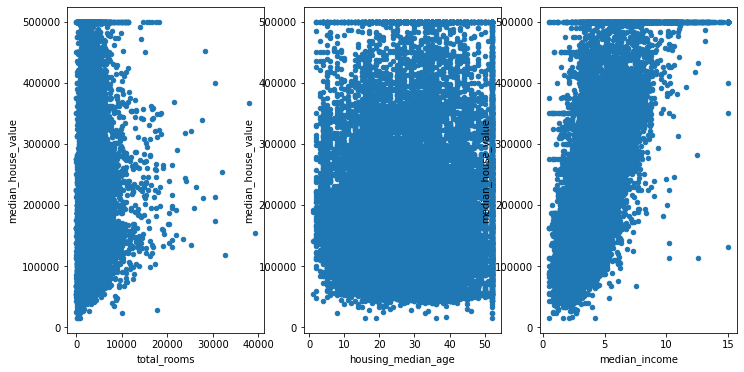

In [17]:
fig, axs = plt.subplots(1, 3)
dt.plot(kind='scatter', x='total_rooms', y='median_house_value', ax=axs[0], figsize=(12,6))
dt.plot(kind='scatter', x='housing_median_age', y='median_house_value', ax=axs[1])
dt.plot(kind='scatter', x='median_income', y='median_house_value', ax=axs[2])


In [18]:
dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


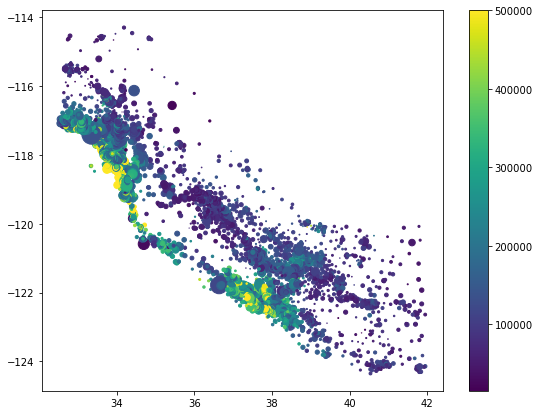

In [19]:
plt.figure(figsize=(9,7))
plt.scatter(dt.latitude,dt.longitude,c=dt.median_house_value,s=dt.population/100)
plt.colorbar()

In [20]:
# vitualizing relationship 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

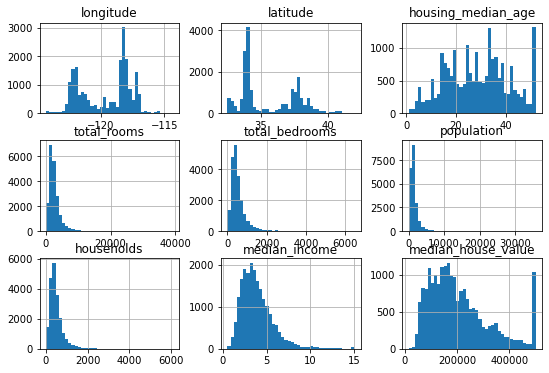

In [21]:

dt.hist(bins=40,figsize=(9,6))

# split the  test data

In [22]:
y=dt['median_house_value']
x=dt.drop('median_house_value',axis=1)


In [23]:
#filled up missing values
x['total_bedrooms'].fillna(x.total_bedrooms.median(),inplace=True)



In [24]:
x['rooms_per_house']=x['total_rooms']/x['households']
x['bedrooms_per_room']=x['total_bedrooms']/x['total_rooms']
x['population_per_household']=x['population']/x['households']


In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)
#training=80% and testinng=20% i.e.0.2

In [26]:
len(xtrain)

16512

In [27]:
len(xtest)

4128

In [28]:
train=xtrain.join(ytrain) #Python string method join()returns a string in which

#the string elements of sequence have been joined by str separator.

corr_mat=train.corr()# for feature selectionn we use correlatio matrix
#correalatio matrix: it is simply a table which dislays the correlation
#for diffirennt variables.coefficient

In [29]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689565
rooms_per_house             0.143220
total_rooms                 0.136670
housing_median_age          0.104681
households                  0.065653
total_bedrooms              0.049392
population                 -0.022397
population_per_household   -0.032061
longitude                  -0.048351
latitude                   -0.142562
bedrooms_per_room          -0.231448
Name: median_house_value, dtype: float64

In [30]:
dt_cols=train[['median_house_value','median_income','total_rooms','housing_median_age']]

In [31]:
from pandas.plotting import scatter_matrix

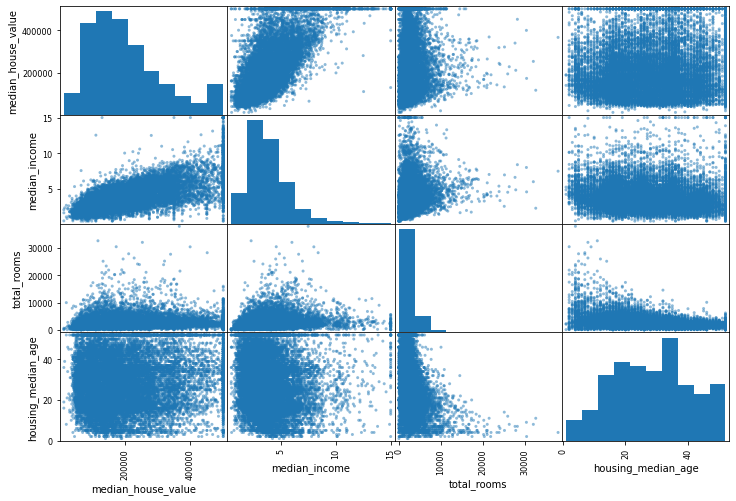

In [32]:
scatter_matrix(dt_cols,figsize=(12,8));

In [33]:
from sklearn.metrics import mean_squared_error
#measures the average of the squares of the errors — that is, the average 
#squared difference between the estimated values 
#MSE is a risk function, corresponding to the expected value of
#the squared error loss. 

In [34]:
mse=mean_squared_error

In [35]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x=train['median_income'].values.reshape(-1,1)
y=train['median_house_value']
lm.fit(x,y)
predict=lm.predict(x)
mse=mean_squared_error(predict,y)
np.sqrt(mse)


83176.9720768228

In [37]:
#categorical data

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9226 to 11590
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  int64  
 3   total_rooms               16512 non-null  int64  
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  int64  
 6   households                16512 non-null  int64  
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_house           16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
 12  median_house_value        16512 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 2.3+ MB


In [39]:
dummies=pd.get_dummies(train['ocean_proximity'])

In [40]:
train=train.join(dummies)

In [41]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_per_room',
       'population_per_household', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [42]:
train=train.drop('<1H OCEAN',axis=1)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9226 to 11590
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  int64  
 3   total_rooms               16512 non-null  int64  
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  int64  
 6   households                16512 non-null  int64  
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_house           16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
 12  median_house_value        16512 non-null  int64  
 13  INLAND                    16512 non-null  uint8  
 14  ISL

# NUMERICAL FEATURES

In [44]:
train=train.drop('ocean_proximity',axis=1)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9226 to 11590
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  int64  
 3   total_rooms               16512 non-null  int64  
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  int64  
 6   households                16512 non-null  int64  
 7   median_income             16512 non-null  float64
 8   rooms_per_house           16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  median_house_value        16512 non-null  int64  
 12  INLAND                    16512 non-null  uint8  
 13  ISLAND                    16512 non-null  uint8  
 14  NEA

In [46]:
y=train['median_house_value']
x=train.drop('median_house_value',axis=1)

# SCALING

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
 from sklearn.pipeline import Pipeline

In [50]:
pipeline=Pipeline([('std_scaler',StandardScaler()),('poly_features',PolynomialFeatures(degree=2))])

In [51]:
housing_prepared=pipeline.fit_transform(x)

 performing linear regression

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [53]:

lm.fit(housing_prepared,y)
lm.score(housing_prepared,y)
lm.predict(housing_prepared[:10])

array([109656.73730469, 145801.18457031, 189212.04589844, 237107.93164062,
       283958.5       , 384672.90527344, 185496.49511719, 118396.29492188,
       196996.93554688, 177580.76367188])

In [54]:
predictions=lm.predict(housing_prepared)
mse=mean_squared_error(predictions,y)
rmse=np.sqrt(mse)
rmse

60447.144526508804

# Regularizedmodels , Cross validation and grid search

In [55]:
from sklearn.model_selection import GridSearchCV



In [56]:
lasso=Lasso()
alphas=[0.5,1,4,10,50,100]
param_grid=[
    {'alpha':alphas}
]
grid_search=GridSearchCV(lasso,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.5, 1, 4, 10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [58]:
grid_search.best_estimator_

Lasso(alpha=100)

In [59]:
lasso=grid_search.best_estimator_

In [60]:
lasso.fit(housing_prepared,y)

Lasso(alpha=100)

In [61]:
predictions=lasso.predict(housing_prepared)
mse=mean_squared_error(predictions,y)


In [62]:
rmse=np.sqrt(mse)
rmse

60906.82191136047

In [63]:
enet=ElasticNet()
alphas=[0.1,0.5,1,4,10,50,100]
param_grid=[
    {'alpha':alphas}
]
grid_search=GridSearchCV(enet,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 4, 10, 50, 100]}],
             scoring='neg_mean_squared_error')

In [64]:
enet=grid_search.best_estimator_
enet.fit(housing_prepared,y)

ElasticNet(alpha=0.5)

In [143]:
predictions=enet.predict(housing_prepared)
mse=mean_squared_error(predictions,y)


In [144]:
rmse=np.sqrt(mse)
rmse

68817.35258305121

# Evaluate on test set

In [145]:
xtest['total_bedrooms'].fillna(xtest.total_bedrooms.median(),inplace=True)

In [146]:
dummies=pd.get_dummies(xtest['ocean_proximity'])

In [147]:
xtest=xtest.join(dummies)

In [148]:
xtest=xtest.drop('ocean_proximity',axis=1)

In [149]:
y=ytest

In [150]:
Scaler=StandardScaler()


In [151]:
x=Scaler.fit_transform(xtest)
enet.fit(x,y)
predictions=enet.predict(x)
mse=mean_squared_error(predictions,y)
rmse=np.sqrt(mse)
rmse



73120.33313023241

In [152]:
lasso.fit(x,y)
predictions=lasso.predict(x)
mse=mean_squared_error(predictions,y)
rmse=np.sqrt(mse)
rmse

68235.94751304896

In [153]:
lm.fit(x,y)
predictions=lm.predict(x)
mse=mean_squared_error(predictions,y)
rmse=np.sqrt(mse)
rmse

68212.47831313906